In [1]:
import numpy as np
import pandas as pd

In [2]:
today_num = int(pd.Timestamp.today().date().strftime("%Y%m%d"))
offset = 0
print(f"our seed is {today_num + offset}")
np.random.seed(today_num + offset)
n = 2000
m = 1000
k = 20
our_dtype = 'float32'

V_orig = np.random.rand(n,m).astype(our_dtype)
V_orig = V_orig / V_orig.sum().sum() * k

our seed is 20230717


In [3]:
def init_klnmf(V, k, seed = 1, eps = 1e-8):
    
    np.random.seed(seed)
    n,m = V.shape
    W = np.random.rand(n, k).astype(our_dtype)
    H = np.random.rand(k, m).astype(our_dtype)
    A = V / (W @ H)    
    H = H * (W.T @ A) / W.sum(axis = 0, keepdims = True).T
    A = V / (W @ H)    
    W = W * (A @ H.T) / H.sum(axis = 1, keepdims = True).T
    
    H = H / H.sum(axis = 1, keepdims = True)
    W = W / W.sum(axis = 0, keepdims = True)
    return W, H, A

In [4]:
W_mat, H_mat, A_mat = init_klnmf(V_orig, k)

In [5]:
def run_mu(V, k, seed = 1, num_iter = 1000, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            #A = V / (W @ H)
            H = H * (W.T @ A) / W.sum(axis = 0, keepdims = True).T
            #
            A = V / (W @ H)
            W = W * (A @ H.T) / H.sum(axis = 1, keepdims = True).T
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [6]:
def run_mu_with_normalize(V, k, seed = 1, num_iter = 1000, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            #A = V / (W @ H)
            H = H * (W.T @ A) / W.sum(axis = 0, keepdims = True).T
            H = H / H.sum(axis = 1, keepdims = True)
            #
            A = V / (W @ H)
            W = W * (A @ H.T) / H.sum(axis = 1, keepdims = True).T
            W = W / W.sum(axis = 0, keepdims = True)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [7]:
res_mu = run_mu(V_orig, k)

init: obj 44.82679943035411
round 50: obj 44.72040728519725
round 100: obj 44.6794891733961
round 150: obj 44.65719798992442
round 200: obj 44.644074239237774
round 250: obj 44.63569263408946
round 300: obj 44.62999395321177
round 350: obj 44.625890769465435
round 400: obj 44.622791566355694
round 450: obj 44.62036899517344
round 500: obj 44.61843041370677
round 550: obj 44.61683777759837
round 600: obj 44.61550334881114
round 650: obj 44.614373721583355
round 700: obj 44.61341170261668
round 750: obj 44.61258415172862
round 800: obj 44.61186436603831
round 850: obj 44.611232079966534
round 900: obj 44.61066726635264
round 950: obj 44.61016420315074
round 1000: obj 44.609710969431866


In [8]:
res_mu_with_normalize = run_mu_with_normalize(V_orig, k)

init: obj 44.82679943035411
round 10: obj 44.78827146480845
round 20: obj 44.76344088505076
round 30: obj 44.74606970737742
round 40: obj 44.73222521732615
round 50: obj 44.72042230556773
round 60: obj 44.71007255504893
round 70: obj 44.70094422291087
round 80: obj 44.6928804297285
round 90: obj 44.68577007244395
round 100: obj 44.67949990223216


In [9]:
def run_scipi(V, k, seed = 1, num_iter = 1000, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            # A = V / (W @ H)
            H = H * np.square(W.T @ A)
            H = H / H.sum(axis = 1, keepdims = True)
            #
            A = V / (W @ H)
            W = W * np.square(A @ H.T)
            W = W / W.sum(axis = 0, keepdims = True)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [10]:
res_scipi = run_scipi(V_orig, k)

init: obj 44.82679943035411
round 50: obj 44.679768838389386
round 100: obj 44.6440134425001
round 150: obj 44.629892863734234
round 200: obj 44.62269405315684
round 250: obj 44.61835102031993
round 300: obj 44.61543921421336
round 350: obj 44.613363065226544
round 400: obj 44.61182478855418
round 450: obj 44.6106369871931
round 500: obj 44.60968164394664
round 550: obj 44.60891560505198
round 600: obj 44.60827068279551
round 650: obj 44.60772136638926
round 700: obj 44.60726050327586
round 750: obj 44.606871880991925
round 800: obj 44.60652212093638
round 850: obj 44.60622505138682
round 900: obj 44.605956353648175
round 950: obj 44.605722465022076
round 1000: obj 44.60550621937083


In [11]:
def run_pgd(V, k, seed = 1, num_iter = 1000, stepsize = 1.0, num_linesearch = 10, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            # A = V / (W @ H)
            H = H + (W.T @ A - W.sum(axis = 0, keepdims = True).T) * H / W.sum(axis = 0, keepdims = True).T * stepsize
            H = np.maximum(H, 0.0)
            #
            A = V / (W @ H)
            W = W + (A @ H.T - H.sum(axis = 1, keepdims = True).T) * W / H.sum(axis = 1, keepdims = True).T * stepsize
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [12]:
res_pgd = run_pgd(V_orig, k, stepsize = 1.5)

init: obj 44.82679943035411
round 50: obj 44.6970410723524
round 100: obj 44.6572130102949
round 150: obj 44.639400758250225
round 200: obj 44.62992552707957
round 250: obj 44.62417558620738
round 300: obj 44.62030819843577
round 350: obj 44.61753586719798
round 400: obj 44.61545447300242
round 450: obj 44.613829888804425
round 500: obj 44.61254147480296
round 550: obj 44.611502208216656
round 600: obj 44.610632218821515
round 650: obj 44.60989908169078
round 700: obj 44.609270371897686
round 750: obj 44.60873273800181
round 800: obj 44.60825852344798
round 850: obj 44.60783318470286
round 900: obj 44.607463635905255
round 950: obj 44.60714343975352
round 1000: obj 44.60684565494822


In [13]:
res_pgd2 = run_pgd(V_orig, k, stepsize = 0.5)

init: obj 44.82679943035411
round 50: obj 44.75338319729136
round 100: obj 44.71997360180186
round 150: obj 44.696516789896954
round 200: obj 44.67934516857432
round 250: obj 44.666688956721295
round 300: obj 44.65718273113536
round 350: obj 44.64986518810557
round 400: obj 44.64411190937327
round 450: obj 44.63950494716929
round 500: obj 44.63575295398997
round 550: obj 44.63265565822886
round 600: obj 44.63006333301829
round 650: obj 44.62785629223155
round 700: obj 44.62595681141185
round 750: obj 44.624306954844464
round 800: obj 44.62285593937205
round 850: obj 44.62157253216075
round 900: obj 44.62043074558543
round 950: obj 44.619410314066876
round 1000: obj 44.61848787258433


In [14]:
def check_sufficient_decrease(obj, obj_new, grad, grad_proj, alpha = 1.0):
    return obj_new - obj - alpha * (grad * grad_proj).sum()

In [15]:
def run_pgd_with_linesearch(V, k, seed = 1, num_iter = 1000, init_stepsize = 1.0, num_linesearch = 10, alpha = 1.0, num_print = 50, eps = 1e-8):
    
    W, H, A = init_klnmf(V, k, seed = seed, eps = eps)
    
    np.random.seed(seed * 2023)
    
    obj_func = np.zeros(num_iter)
    obj_intercept = k * np.log(k) - k + 1
    
    for i in range(num_iter):
        if i > 0:
            #
            obj = obj_func[i-1]
            G = -(W.T @ A - W.sum(axis = 0, keepdims = True).T) * H / W.sum(axis = 0, keepdims = True).T
            stepsize = init_stepsize
            for j in range(num_linesearch):
                H_temp = H - G * stepsize
                H_temp = np.maximum(H_temp, 0.0)
                G_proj = H_temp - H
                A_temp = V / (W @ H_temp)
                obj_temp = obj_intercept + (V * np.log(A_temp + eps)).sum().sum()
                if check_sufficient_decrease(obj, obj_temp, G, G_proj, alpha) < 0.0:
                    break
                else:
                    stepsize = stepsize * 0.5
            #print(i, stepsize)
            H = H - G * stepsize
            H = np.maximum(H, 0.0)
            A = V / (W @ H)
            obj = obj_intercept + (V * np.log(A + eps)).sum().sum()
            #
            G = -(A @ H.T - H.sum(axis = 1, keepdims = True).T) * W / H.sum(axis = 1, keepdims = True).T
            W = W - G * stepsize
            stepsize = init_stepsize
            for j in range(num_linesearch):
                W_temp = W - G * stepsize
                W_temp = np.maximum(W_temp, 0.0)
                G_proj = W_temp - W
                A_temp = V / (W_temp @ H)
                obj_temp = obj_intercept + (V * np.log(A_temp + eps)).sum().sum()
                if check_sufficient_decrease(obj, obj_temp, G, G_proj, alpha) < 0.0:
                    break
                else:
                    stepsize = stepsize * 0.5
            #print(i, stepsize)
            W = W - G * stepsize
            W = np.maximum(W, 0.0)
            #
            A = V / (W @ H)
        else:
            A = V / (W @ H)
        obj_func[i] = obj_intercept + (V * np.log(A + eps)).sum().sum()
        if i == 0:
            print(f"init: obj {obj_func[i]}")
        elif i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return W, H, A, obj_func

In [16]:
res_pgd_with_linesearch = run_pgd_with_linesearch(V_orig, k)

init: obj 44.82679943035411
round 50: obj 44.69629768322276
round 100: obj 44.660195626719464
round 150: obj 44.64293507526683
round 200: obj 44.633146323664654
round 250: obj 44.62694291065501
round 300: obj 44.62266735027598
round 350: obj 44.61954525898265
round 400: obj 44.617165126307476
round 450: obj 44.61530593822764
round 500: obj 44.61379865597056
round 550: obj 44.612625159724224
round 600: obj 44.611659087641705
round 650: obj 44.61085323284434
round 700: obj 44.610162057383526
round 750: obj 44.609570779307354
round 800: obj 44.60905198047923
round 850: obj 44.60860947559642
round 900: obj 44.60821298549937
round 950: obj 44.60786870907115
round 1000: obj 44.607619800074566


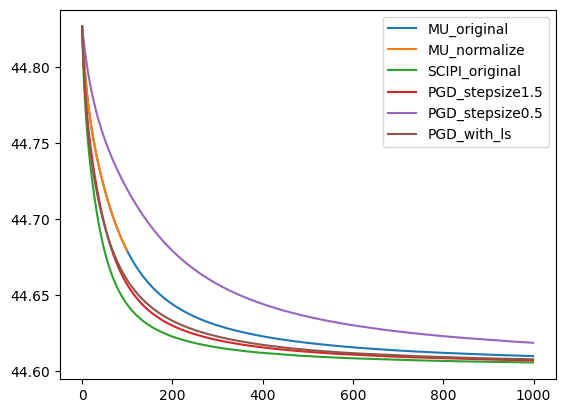

In [21]:
import matplotlib.pyplot as plt
plt.plot(res_mu[3])
plt.plot(res_mu_with_normalize[3])
plt.plot(res_scipi[3])
plt.plot(res_pgd[3])
plt.plot(res_pgd2[3])
plt.plot(res_pgd_with_linesearch[3])
plt.legend(["MU_original", "MU_normalize", "SCIPI_original", "PGD_stepsize1.5", "PGD_stepsize0.5", "PGD_with_ls"])